In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_dir=''
test_dir=''
image_generator=ImageDataGenerator(1.0/255)

In [7]:
# train_generator=image_generator.flow_from_directory(
#     train_dir,
#     batch_size=10000,
#     target_size=(28,28),
#     color_mode='grayscale',
#     class_mode='categorical',
#     shuffle=True,
#     )

In [8]:
# test_generator=image_generator.flow_from_directory(
#     test_dir,
#     batch_size=50000,
#     target_size=(28,28),
#     color_mode='greyscale',
#     class_mode='categorical',
#     shuffle=True,
#     )

In [9]:
# x_train,y_train=train_generator[0]
# x_test,y_test=test_generator[0]

In [10]:
# # for cifar10
# train_path=''
# test_path=''
# train_gen=ImageDataGenerator.flow_from_directory(
#     train_path,
#     target_size=(32,32),
#      batch_size=20000,
# )
# test_get=ImageDataGenerator.flow_from_directory(
#     test_path,
#     target_size=(32,32),
#      batch_size=2000,
# )
# x_train,y_train=train_gen[0]


In [11]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


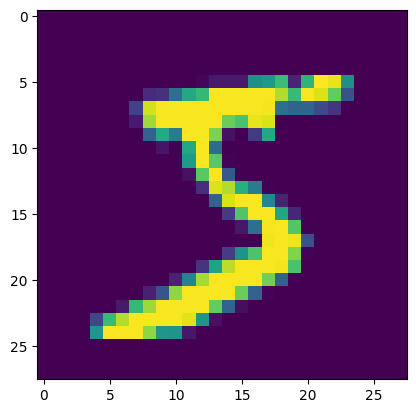

In [13]:
plt.imshow(x_train[0])

In [14]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [16]:
x_train=x_train/255
x_test=x_test/255

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [17]:
model=Sequential([
    Flatten(input_shape=(28,28)),
    Dense(50,activation='relu'),
    Dense(50,activation='relu'),
    Dense(10,activation='softmax'),
])

C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model.compile(optimizer='sgd',metrics=['accuracy'],loss=tf.keras.losses.SparseCategoricalCrossentropy)

In [20]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=30,shuffle=True,epochs=10)

Epoch 1/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9030 - loss: 0.3367 - val_accuracy: 0.9207 - val_loss: 0.2776
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9193 - loss: 0.2840 - val_accuracy: 0.9336 - val_loss: 0.2354
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9339 - loss: 0.2312 - val_accuracy: 0.9382 - val_loss: 0.2122
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9389 - loss: 0.2140 - val_accuracy: 0.9425 - val_loss: 0.1955
Epoch 5/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9471 - loss: 0.1840 - val_accuracy: 0.9481 - val_loss: 0.1778
Epoch 6/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9487 - loss: 0.1733 - val_accuracy: 0.9526 - val_loss: 0.1652
Epoch 7/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9546 - loss: 0.1580 - val_accuracy: 0.9533 - val_loss: 0.1567
Epoch 8/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9576 - loss: 0.1460 - 

<Axes: >

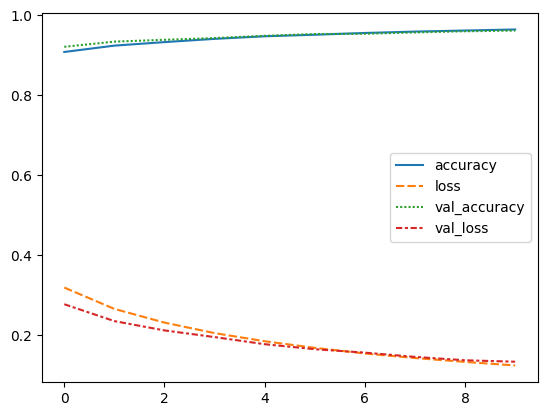

In [21]:
sns.lineplot(model.history.history)

In [22]:
pred=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Text(0.5, 1.0, '2')

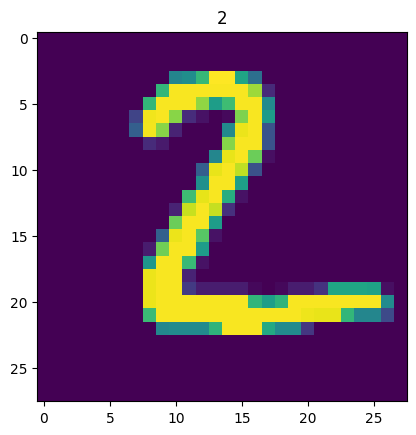

In [24]:
plt.imshow(x_test[1])
plt.title(pred[1].argmax())